# Simple Climate Model
##### Eric Keenan
##### University of Colorado Boulder
##### Department of Atmospheric and Oceanic Sciences

In [1]:
# External python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import math
import time as tm

# Python scripts from this project 
import model_grids as mg
import energy_balance_model as ebm
import utilities as util
import tests

# User editable variables

In [2]:
'''
Model time domain
    t0: Initial timestep (YYMMDD)
    tf: Final timestep (YYMMDD)
    temporal_resolution (hours)
'''
# t0 = pd.to_datetime('20000101', format='%Y%m%d')
# tf = pd.to_datetime('20001231', format='%Y%m%d')
t0=2000
tf=2001

# Main function definition

In [3]:
def main():
# Main function to perform climate model calculations

    # Run unit tests
    tests.main()

    # Starting computations
    print("Starting computations...")

    # Define grids
    time, lon, lat = mg.get_grids(t0, tf)

    # Calculate net surface energy balance
    iswr = ebm.get_iswr(time, lon, lat)

    # Calculate temperature 
    temperature = ebm.get_temperature(iswr)

    # Print mean earth temperature
    print(util.K_to_C(temperature).mean())

    # Ending computations
    print("Computations complete!")
    
    # Return a variable (for development purposes)
    return time, lon, lat, iswr, temperature

# Execute main function

In [4]:
# Start time
start = tm.time()

# Execute main function
if __name__ == "__main__":
    time, lon, lat, iswr, temperature = main()

# Print timing restults
end = tm.time()
wall_clock_time = end - start
print()
print("WALL CLOCK TIME:")
print(int(wall_clock_time))
print("Seconds")


Passed all tests! 
Starting computations...
-136.69512442176196
Computations complete!

WALL CLOCK TIME:
9
Seconds


# Vizualizations

# Map at a given time

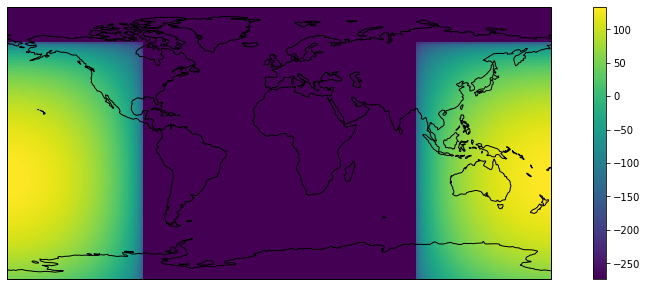

In [5]:
# Define X and Y coordinates
X = lon[0,:]
Y = lat[:,0]

# Define time index
time_index = 0

# Create a map
plt.figure(figsize=(15, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
pcolor = ax.pcolor(X, Y, util.K_to_C(temperature[:,:,time_index]))
cbar = plt.colorbar(pcolor)
ax.coastlines()

# Time series

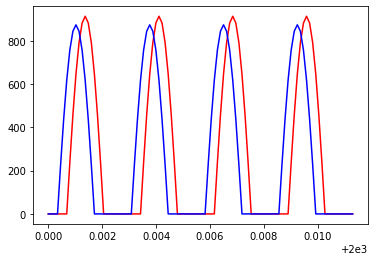

In [6]:
time_indices = np.arange(0,100)

# SEB[lat, lon, time]
ts1 = iswr[50, 0, time_indices]
ts2 = iswr[90, 45, time_indices]

plt.plot(time[time_indices], ts1, 'r')
plt.plot(time[time_indices], ts2, 'b')

# Sandbox for tests

In [7]:
temperature.shape

(181, 361, 1000)